<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/PhotoClassifiyng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

np.random.seed(42)
m = 100

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

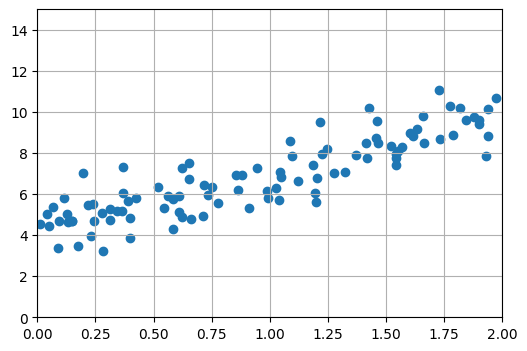

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.grid();

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.score(X,y)*100

76.92735413614223

In [ ]:
predictions = lin_reg.predict(X)

In [ ]:
X_new = ([[0], [2]])
y_predictions = lin_reg.predict(X_new)

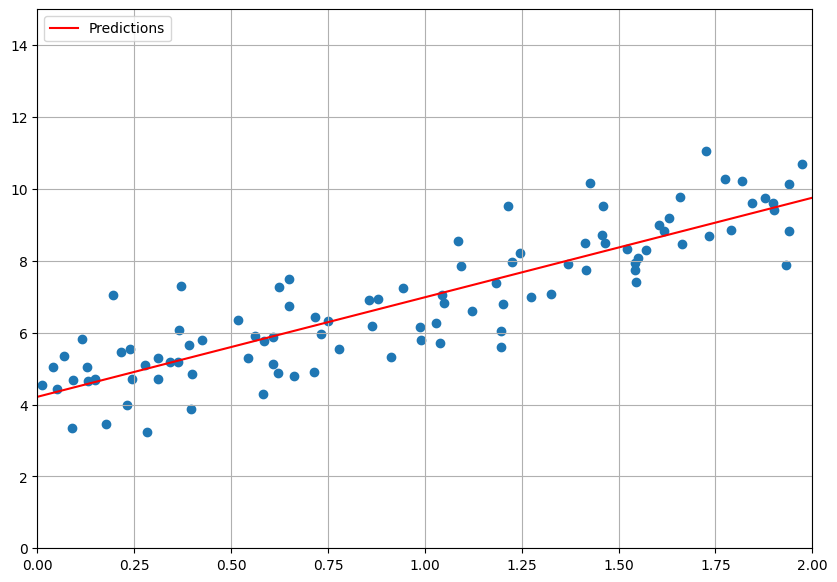

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(X_new, y_predictions, 'r-', label = 'Predictions')
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper left');

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
import matplotlib.pyplot as plt

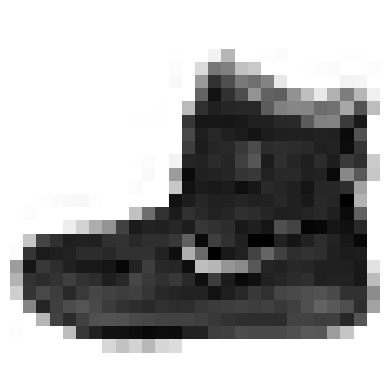

In [ ]:
def digit_image(num_image):
    num_image_reshaped = num_image.reshape(28, 28)
    plt.imshow(num_image_reshaped, cmap = 'binary')
    plt.axis('off')

some_digit = train_images[0]
digit_image(some_digit)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_images.reshape(60000, 784), train_labels)         # 60 k yeni hamisini

RandomForestClassifier()

In [ ]:
clf.score(test_images.reshape(10000, 784), test_labels)

0.8755

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 50, 70],
    'criterion': ['gini','entropy','log_loss']
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3)
grid_rfc.fit(train_images.reshape(60000, 784), train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [30, 50, 70]})

In [ ]:
grid_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 70}

In [ ]:
grid_rfc.best_estimator_.fit(train_images.reshape(60000, 784), train_labels)

RandomForestClassifier(criterion='entropy', n_estimators=70)

In [ ]:
grid_rfc.best_estimator_.score(test_images.reshape(10000, 784), test_labels)

0.8773